In [1]:
#neural networks

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [6]:
dataset = pd.read_csv(r'C:\Users\Giacomo\Desktop\polimi\tesi\SIEMENS\Dataturbine1ok.csv')

In [13]:
#Variables

x=dataset.drop(['actpower_mean','actpower_SD','MeasuringTime'], axis = 'columns')
y=dataset['actpower_mean'].values
y=np.reshape(y, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x))
xscale=scaler_x.transform(x)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [14]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

In [32]:
model = Sequential()
model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                280       
_________________________________________________________________
dense_7 (Dense)              (None, 12)                252       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 13        
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='mae', optimizer='adam', metrics=['mse','mae'])

In [34]:
>>> history = model.fit(X_train, y_train, epochs=50, batch_size=50,  verbose=1, validation_split=0.2)

Train on 30527 samples, validate on 7632 samples
Epoch 1/50
30527/30527 [==============================] - 2s 56us/sample - loss: 0.0783 - mse: 0.0249 - mae: 0.0783 - val_loss: 0.0196 - val_mse: 0.0023 - val_mae: 0.0196
Epoch 2/50
30527/30527 [==============================] - 1s 30us/sample - loss: 0.0160 - mse: 0.0013 - mae: 0.0160 - val_loss: 0.0131 - val_mse: 8.5507e-04 - val_mae: 0.0131
Epoch 3/50
30527/30527 [==============================] - 1s 30us/sample - loss: 0.0124 - mse: 7.6853e-04 - mae: 0.0124 - val_loss: 0.0113 - val_mse: 5.9820e-04 - val_mae: 0.0113
Epoch 4/50
30527/30527 [==============================] - 1s 30us/sample - loss: 0.0112 - mse: 6.1230e-04 - mae: 0.0112 - val_loss: 0.0111 - val_mse: 5.2663e-04 - val_mae: 0.0111
Epoch 5/50
30527/30527 [==============================] - 1s 30us/sample - loss: 0.0106 - mse: 5.2469e-04 - mae: 0.0106 - val_loss: 0.0093 - val_mse: 4.0414e-04 - val_mae: 0.0093
Epoch 6/50
30527/30527 [==============================] - 1s 30us/sa

30527/30527 [==============================] - 1s 30us/sample - loss: 0.0057 - mse: 1.5033e-04 - mae: 0.0057 - val_loss: 0.0054 - val_mse: 1.4823e-04 - val_mae: 0.0054
Epoch 47/50
30527/30527 [==============================] - 1s 30us/sample - loss: 0.0055 - mse: 1.4613e-04 - mae: 0.0055 - val_loss: 0.0052 - val_mse: 1.2553e-04 - val_mae: 0.0052
Epoch 48/50
30527/30527 [==============================] - 1s 30us/sample - loss: 0.0056 - mse: 1.4647e-04 - mae: 0.0056 - val_loss: 0.0050 - val_mse: 1.2844e-04 - val_mae: 0.0050
Epoch 49/50
30527/30527 [==============================] - 1s 31us/sample - loss: 0.0056 - mse: 1.4526e-04 - mae: 0.0056 - val_loss: 0.0055 - val_mse: 1.3091e-04 - val_mae: 0.0055
Epoch 50/50
30527/30527 [==============================] - 1s 30us/sample - loss: 0.0059 - mse: 1.4520e-04 - mae: 0.0059 - val_loss: 0.0070 - val_mse: 1.4863e-04 - val_mae: 0.0070


dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


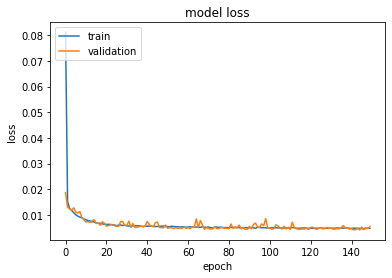

In [21]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

X=[[1363.63514833]
 [1307.00982667]
 [ 255.1827    ]
 ...
 [2098.13873   ]
 [ 961.51333333]
 [1732.34023   ]], Predicted=[[1333.6505]
 [1282.3229]
 [ 253.0982]
 ...
 [2090.0227]
 [ 968.5346]
 [2109.7058]]
22.319074326192553


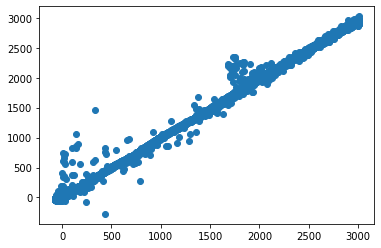

In [35]:
import matplotlib.pyplot as plt
Xnew= scaler_x.transform(X_test)
ynew= model.predict(X_test)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
ytest = scaler_y.inverse_transform(y_test)
print("X=%s, Predicted=%s" % (ytest, ynew))
plt.scatter(ytest, ynew)
print(np.mean(abs(ytest-ynew)))